In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("fridge.csv")
data

,index,name,price,number_of_comment,brand,size,volume(l),number_of_door,comment
0,0,Tủ Lạnh Sharp Inverter 556L SJ-FX631V-SL,14499000,76,Sharp,(C x R x D): 172 x 89 x 77 cm,626,4.0,tủ đẹp các ngăn chưa đồ rất vừa ý mình hệ thốn...
1,0,Tủ Lạnh Sharp Inverter 556L SJ-FX631V-SL,14499000,76,Sharp,(C x R x D): 172 x 89 x 77 cm,626,4.0,Chào Tiki Mình mua sp này có gói TikiPro tuy n...
2,0,Tủ Lạnh Sharp Inverter 556L SJ-FX631V-SL,14499000,76,Sharp,(C x R x D): 172 x 89 x 77 cm,626,4.0,Chất lượng Rất ổn ít nhất là đến thời điểm hiệ...
3,0,Tủ Lạnh Sharp Inverter 556L SJ-FX631V-SL,14499000,76,Sharp,(C x R x D): 172 x 89 x 77 cm,626,4.0,Khi giao hàng thì mình được thông báo là không...
4,0,Tủ Lạnh Sharp Inverter 556L SJ-FX631V-SL,14499000,76,Sharp,(C x R x D): 172 x 89 x 77 cm,626,4.0,Tủ lạnh ngon đẹp nhìn sang chứa đc nhiều đồ nh...
...,...,...,...,...,...,...,...,...,...
2686,548,Tủ Lạnh Inverter Mitsubishi Electric MR-CGX41E...,14480000,1,Mitsubishi Electric,60 x 66 x 169.8 (cm),NaN,NaN,Cực kì hài lòng
2687,552,Tủ Lạnh Inverter Panasonic NR-BL26AVPVN (234L)...,5979000,1,Panasonic,60 x 61.1 x 144.9 (cm),234,NaN,thay cai đơi cu thây ôn lâu dai chưa biêt thê ...
2688,554,Tủ Lạnh Inverter Electrolux EHE6879A-BCVN (615...,37090000,0,Electrolux,91.3 x 74.6 x 178.2 cm,617,4.0,Dùng dc hơn tuần ổn Giao hàng siêu nhanh Có đ...
2689,558,Tủ lạnh Electrolux Inverter 350 Lít ETB3700J-A...,9749000,1,Electrolux,NaN,350,2.0,Giao hàng nhanh không móp méo Còn chất lượng t...


In [3]:
data['number_of_comment'].isin([0]).sum()

1

In [4]:
review_predict = data['comment']

In [5]:
sentiment = pd.read_csv('text.csv',index_col=[0])
sentiment

,text_lb,text
2,1.0,"Ấn tượng, tôi sẽ quay lại vào dịp nghỉ lần sau"
3,1.0,"Quá tuyệt vời , view đẹp , chủ nhà thân thiện ..."
6,1.0,"Phòng nghỉ đáng giá, tiện nghi cơ bản đầy đủ ^..."
7,1.0,Thuận tiện cho việc đi thăm thú cảnh quan.\nBạ...
10,1.0,Nhân viên thân thiện
...,...,...
6994,1.0,"Anh chủ rất là nhiệt tình và vui vẻ, phòng sạc..."
6995,1.0,"Vị trí đẹp, mặc dù chúng tôi là khách duy nhất..."
6996,-1.0,"Không có chỗ đỗ xe, phải gửi xe ở ngoài rất tố..."
6997,1.0,"Gửi quản lý cấp cao của khách sạn, Rất tiếc hì..."


In [6]:
with open('vietnamese_stopwords.txt', encoding="utf8") as f:
    stopwords = []
    for line in f:
        stopwords.append("_".join(line.strip().split()))

In [7]:
import re
from pyvi import ViTokenizer
def preprocessor(text):
    corpus = []
    for i in range(0, len(text)):
        review = re.sub(r"http\S+", "", str(text[i]))
        review = re.sub(r"#\S+", "", review)
        review = re.sub(r"@\S+", "", review)
        review = re.sub('[_]',' ',review)
        review = re.sub('[^a-zA-Z_áàạảãăắằặẵẳâấầẩậẫđíỉìịĩóòỏọõôốồổộỗơớờởợỡéèẹẽẻêếềểệễúùủũụưứừửựữýỳỷỹỵÁÀẢÃẠĂẮẰẲẲẶẴÂẤẦẬẪẨĐÍÌỈỊĨÓÒỎỌÕÔỐỒỔỘỖƠỚỜỞỢỠÉÈẺẸẼÊẾỀỆỂỄÚÙỦŨỤƯỨỪỬỰỮÝỲỶỴỸ]',
                        ' ',review)
        review = ViTokenizer.tokenize(review)
        review = review.lower()
        review = review.split()
        review = [word for word in review if not word in  set(stopwords)]
        review = ' '.join(review)
        corpus.append(review)
    return corpus

In [8]:
X = sentiment['text'].values
corpus = preprocessor(X)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(analyzer='word', max_features=30000)
tfidf_vect.fit(corpus) 
X_data_tfidf =  tfidf_vect.transform(corpus)

from sklearn.model_selection import train_test_split
X = X_data_tfidf
y = sentiment['text_lb'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
predictions = clf.predict(X_test)
print('accuracy:',accuracy_score(y_test,predictions))

accuracy: 0.8759615384615385


In [10]:
from sklearn import svm
classifier = svm.SVC(probability=True)
classifier.fit(X_train, y_train)
train_predictions = classifier.predict(X_train)
predictions = classifier.predict(X_test)
print('accuracy:',accuracy_score(y_test,predictions))
print('confusion matrix:\n',confusion_matrix(y_test,predictions))
print('classification report:\n',classification_report(y_test,predictions))

accuracy: 0.885576923076923
confusion matrix:
 [[ 84 100]
 [ 19 837]]
classification report:
               precision    recall  f1-score   support

        -1.0       0.82      0.46      0.59       184
         1.0       0.89      0.98      0.93       856

    accuracy                           0.89      1040
   macro avg       0.85      0.72      0.76      1040
weighted avg       0.88      0.89      0.87      1040



In [11]:
X_1 = review_predict.values
corpus1 = preprocessor(X_1)
X_data_tfidf_1 =  tfidf_vect.transform(corpus1)

In [12]:
proba = classifier.predict_proba(X_data_tfidf_1)

In [13]:
df1 = pd.DataFrame(data=proba, columns=['Negative', 'Positive'])

In [14]:
data = pd.concat([data, df1], axis = 1).drop(columns = ['comment'])
data

,index,name,price,number_of_comment,brand,size,volume(l),number_of_door,Negative,Positive
0,0,Tủ Lạnh Sharp Inverter 556L SJ-FX631V-SL,14499000,76,Sharp,(C x R x D): 172 x 89 x 77 cm,626,4.0,0.318267,0.681733
1,0,Tủ Lạnh Sharp Inverter 556L SJ-FX631V-SL,14499000,76,Sharp,(C x R x D): 172 x 89 x 77 cm,626,4.0,0.915577,0.084423
2,0,Tủ Lạnh Sharp Inverter 556L SJ-FX631V-SL,14499000,76,Sharp,(C x R x D): 172 x 89 x 77 cm,626,4.0,0.370889,0.629111
3,0,Tủ Lạnh Sharp Inverter 556L SJ-FX631V-SL,14499000,76,Sharp,(C x R x D): 172 x 89 x 77 cm,626,4.0,0.534224,0.465776
4,0,Tủ Lạnh Sharp Inverter 556L SJ-FX631V-SL,14499000,76,Sharp,(C x R x D): 172 x 89 x 77 cm,626,4.0,0.584364,0.415636
...,...,...,...,...,...,...,...,...,...,...
2686,548,Tủ Lạnh Inverter Mitsubishi Electric MR-CGX41E...,14480000,1,Mitsubishi Electric,60 x 66 x 169.8 (cm),NaN,NaN,0.151211,0.848789
2687,552,Tủ Lạnh Inverter Panasonic NR-BL26AVPVN (234L)...,5979000,1,Panasonic,60 x 61.1 x 144.9 (cm),234,NaN,0.329384,0.670616
2688,554,Tủ Lạnh Inverter Electrolux EHE6879A-BCVN (615...,37090000,0,Electrolux,91.3 x 74.6 x 178.2 cm,617,4.0,0.274112,0.725888
2689,558,Tủ lạnh Electrolux Inverter 350 Lít ETB3700J-A...,9749000,1,Electrolux,NaN,350,2.0,0.401152,0.598848


In [15]:
group_data = data.groupby(['index', 'name', 'price', 'number_of_comment', 'size', 'brand', 'volume(l)', 'number_of_door'], as_index=False, dropna=False).mean()
group_data['rank_point'] = group_data.number_of_comment * group_data.Positive
group_data

,index,name,price,number_of_comment,size,brand,volume(l),number_of_door,Negative,Positive,rank_point
0,0,Tủ Lạnh Sharp Inverter 556L SJ-FX631V-SL,14499000,76,(C x R x D): 172 x 89 x 77 cm,Sharp,626,4.0,0.221866,0.778134,59.138191
1,1,Tủ lạnh Samsung Inverter 208 lít RT19M300BGS/S...,4269000,147,(D x R x C) 55.5 x 63.7 x 144.5 cm,Samsung,216,2.0,0.295234,0.704766,103.600533
2,2,Tủ Lạnh Aqua 130 lít AQR-T150FA-BS,3499000,32,48.1 x 56.5 x 124 (cm),Aqua,130,NaN,0.209653,0.790347,25.291106
3,3,Tủ lạnh Samsung Inverter 208 lít RT19M300BGS/SV,4259000,112,55.5 x 63.7 x 144.5 cm (D x R x C),Samsung,216,2.0,0.231003,0.768997,86.127641
4,4,Tủ Lạnh Inverter Samsung Rt35k5982s8/Sv (360l)...,9279000,13,(D x R x C cm) 67.5 x 66.2 x 171.2 cm,Samsung,NaN,NaN,0.202694,0.797306,10.364974
...,...,...,...,...,...,...,...,...,...,...,...
300,548,Tủ Lạnh Inverter Mitsubishi Electric MR-CGX41E...,14480000,1,60 x 66 x 169.8 (cm),Mitsubishi Electric,NaN,NaN,0.151211,0.848789,0.848789
301,552,Tủ Lạnh Inverter Panasonic NR-BL26AVPVN (234L)...,5979000,1,60 x 61.1 x 144.9 (cm),Panasonic,234,NaN,0.329384,0.670616,0.670616
302,554,Tủ Lạnh Inverter Electrolux EHE6879A-BCVN (615...,37090000,0,91.3 x 74.6 x 178.2 cm,Electrolux,617,4.0,0.274112,0.725888,0.000000
303,558,Tủ lạnh Electrolux Inverter 350 Lít ETB3700J-A...,9749000,1,NaN,Electrolux,350,2.0,0.401152,0.598848,0.598848


In [16]:
rank_data = group_data.drop(columns=['index', 'name', 'brand', 'size', 'number_of_comment', 'Negative', 'Positive'])
rank_data.values

array([[14499000, '626', 4.0, 59.13819130616326],
       [4269000, '216', 2.0, 103.60053324208788],
       [3499000, '130', nan, 25.291105663697767],
       ...,
       [37090000, '617', 4.0, 0.0],
       [9749000, '350', 2.0, 0.598847693070296],
       [8379000, '333', 2.0, 0.8075268314972065]], dtype=object)

In [17]:
pd.set_option('display.max_rows', rank_data.shape[0]+1)
rank_data[lambda col :rank_data.columns] = rank_data[lambda col :rank_data.columns].replace(r'\D+', np.NaN, regex=True)
rank_data

,price,volume(l),number_of_door,rank_point
0,14499000,626,4.0,59.138191
1,4269000,216,2.0,103.600533
2,3499000,130,NaN,25.291106
3,4259000,216,2.0,86.127641
4,9279000,NaN,NaN,10.364974
5,3999000,165,NaN,49.264867
6,2690000,NaN,1.0,97.602338
7,1590000,NaN,NaN,0.848789
8,4269000,216,2.0,24.289874
9,10579000,380,2.0,13.364022


In [18]:
from sklearn.impute import KNNImputer
data_imputed = rank_data.values
ix = [i for i in range(data_imputed.shape[1]) if i != len(rank_data.columns)]
X = data_imputed[:, ix]
imputer = KNNImputer(n_neighbors=len(rank_data.columns))
imputer.fit(X)
Xtrans = imputer.transform(X)
X.shape

(305, 4)

In [19]:
rank_data = pd.DataFrame(Xtrans,index=rank_data.index, columns=rank_data.columns)
rank_data.describe()

,price,volume(l),number_of_door,rank_point
count,3.050000e+02,305.000000,305.000000,305.000000
mean,1.203553e+07,357.896721,11.704918,6.024481
std,9.039063e+06,161.544672,67.153486,12.352508
min,1.017000e+06,2.000000,1.000000,0.000000
25%,5.599000e+06,250.250000,2.000000,0.891841
50%,9.990000e+06,333.500000,2.000000,2.190779
75%,1.518900e+07,460.000000,3.000000,5.511076
max,6.699000e+07,680.000000,715.000000,103.600533


pearson correlation heatmap



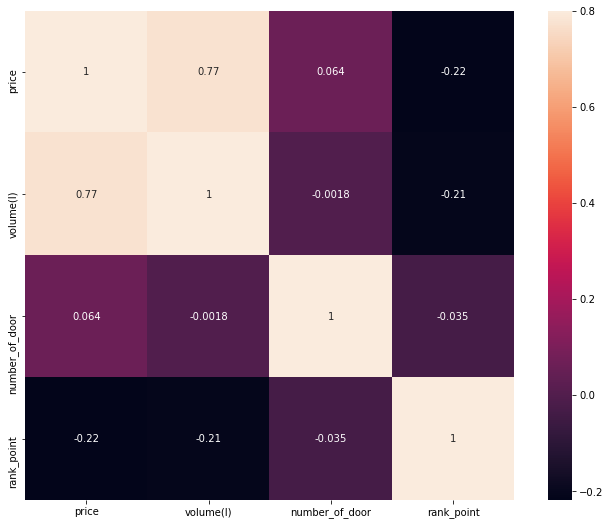

spearman correlation heatmap



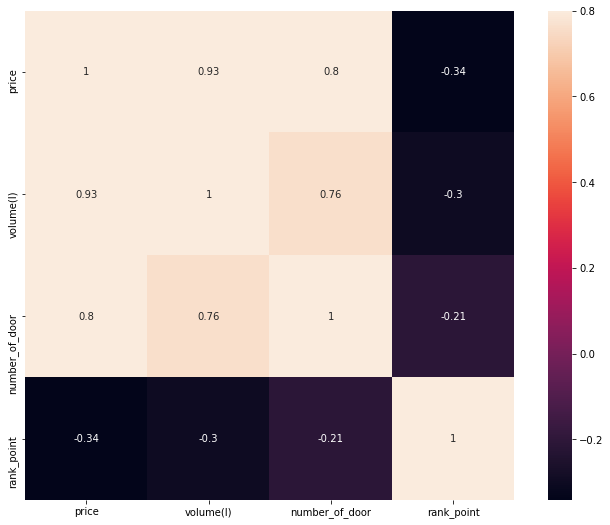

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
def print_heatmap(cor_method):
  corrmat = rank_data.corr(method=cor_method)
  print("{} correlation heatmap\n".format(cor_method))
  f, ax = plt.subplots(figsize=(12, 9))
  sns.heatmap(corrmat,annot= True, vmax=.8, square=True)
  plt.show()
print_heatmap('pearson')
print_heatmap('spearman')

In [21]:
from sklearn.preprocessing import StandardScaler

Standard_scaler = StandardScaler()
Xtrans = Standard_scaler.fit_transform(Xtrans)

In [22]:
rank_data_scaled = pd.DataFrame(Xtrans,index=rank_data.index, columns=rank_data.columns)

In [23]:
from skcriteria import Data, MIN, MAX
ranking = Data(
    rank_data_scaled,
    [MIN, MAX, MAX, MAX],
    cnames = rank_data.columns,
    weights = [10,5,1,10]
)

In [24]:
from skcriteria.madm import simple
dm = simple.WeightedSum(mnorm = "sum",wnorm = "sum")
dec = dm.decide(ranking)

In [25]:
rank_data['rank'] = dec.rank_
rank_data.sort_values(by=['rank'])

,price,volume(l),number_of_door,rank_point,rank
226,17290000.0,680.00,2.75,0.671150,1
122,18890000.0,680.00,3.50,0.848789,2
229,32490000.0,668.00,3.50,0.848789,3
147,20249000.0,678.00,3.50,1.607849,4
87,15459000.0,679.00,2.00,1.794809,5
173,19590000.0,678.00,3.50,1.897994,6
91,16479000.0,678.00,4.00,2.083894,7
302,37090000.0,617.00,4.00,0.000000,8
58,15490000.0,588.00,180.75,0.848789,9
223,15510300.0,588.00,180.75,0.939353,10


In [26]:
cols_to_keep = ['index', 'name', 'brand', 'number_of_comment', 'Negative', 'Positive']
group_data = group_data.drop(group_data.columns.difference(cols_to_keep), axis=1)

In [27]:
pd.concat([group_data, rank_data], axis=1, join="inner").to_csv('fridge_done.csv')